In [1]:
import pandas as pd
import pandas_profiling
import pandas.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, utils, tree, pipeline, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, confusion_matrix, accuracy_score, f1_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.externals import joblib

C:\Users\morga\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# DECLARATION PART

PIPELINEPATH= "ser_pipeline.pickle"
DATASETPATH = "../women.data"

Load Dataset

In [3]:
def show_df_info(dataframe):
    print(type(dataframe))
    print("amount of entries is %s" % dataframe.size)
    print("dimensions= %i" % dataframe.ndim)
    print("shape is ", end="")
    print(dataframe.shape)
    print("data types of columns:")
    print(dataframe.dtypes)

In [4]:
dataset = pandas.read_csv(DATASETPATH, index_col='Unnamed: 0')
show_df_info(dataset)
display(dataset.head(5))

<class 'pandas.core.frame.DataFrame'>
amount of entries is 14730
dimensions= 2
shape is (1473, 10)
data types of columns:
Wifes_age                       int64
Wifes_education                 int64
Husbands_education              int64
Number_of_children_ever_born    int64
Wifes_religion                  int64
Wifes_now_working%3F            int64
Husbands_occupation             int64
Standard-of-living_index        int64
Media_exposure                  int64
Contraceptive_method_used       int64
dtype: object


,Wifes_age,Wifes_education,Husbands_education,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Husbands_occupation,Standard-of-living_index,Media_exposure,Contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [5]:
pandas_profiling.ProfileReport(dataset)

# Dataset exploration

Text(0.5, 1.0, 'A large sample of wifes are 27 yo')

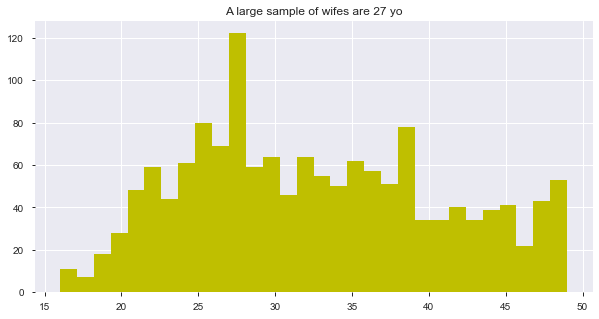

In [6]:
dataset['Wifes_age'].hist(bins=30, color = 'y', figsize=(10, 5))
plt.title('A large sample of wifes are 27 yo')

In [7]:
#sns.violinplot("Wifes_age", data=dataset)

Text(0.5, 1.0, 'Having one child born seems a most common case')

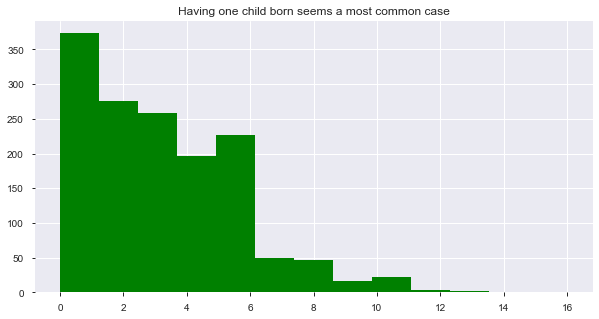

In [8]:
dataset['Number_of_children_ever_born'].hist(bins=13, color = 'G', figsize=(10, 5))
plt.title('Having one child born seems a most common case')

Text(0.5, 1.0, 'The average number of children born is 3')

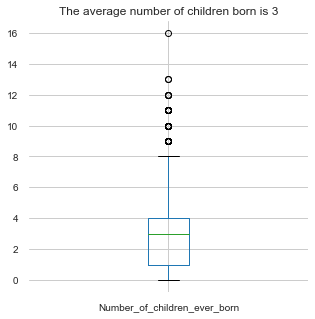

In [9]:
plt.style.use('seaborn-notebook')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (5, 5)
dataset.boxplot(column='Number_of_children_ever_born')
plt.title('The average number of children born is 3')

In [10]:
#sns.distplot(dataset['Number_of_children_ever_born'],bins=14,kde=False,color='red')

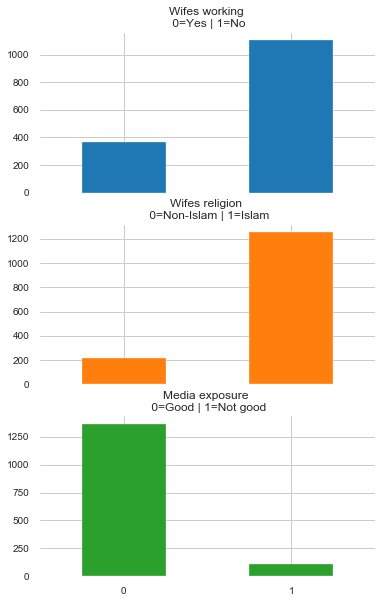

In [11]:
df = pd.DataFrame({'Wifes working \n 0=Yes | 1=No': dataset['Wifes_now_working%3F'].value_counts(), 
                   'Wifes religion \n 0=Non-Islam | 1=Islam' : dataset['Wifes_religion'].value_counts(),
                   'Media exposure \n 0=Good | 1=Not good': dataset.Media_exposure.value_counts()})
plt.rcParams['figure.figsize'] = (6,10)
axes = df.plot.bar(rot=0, subplots=True, legend = False) 

In [12]:
#dataset['Wifes_now_working%3F'].value_counts().plot.bar(color = 'yellow', title = 'Most of wifes are working \n0=Yes | 1=No') #

In [13]:
#dataset['Wifes_religion'].value_counts().plot.bar(color = 'green', title = 'Only 6 % of wifes are not muslim \n #0=Non-Islam | 1=Islam') 

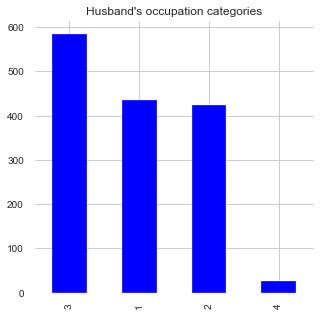

In [14]:
dataset['Husbands_occupation'].value_counts().plot.bar(color = 'b', title = "Husband's occupation categories", figsize = (5,5))

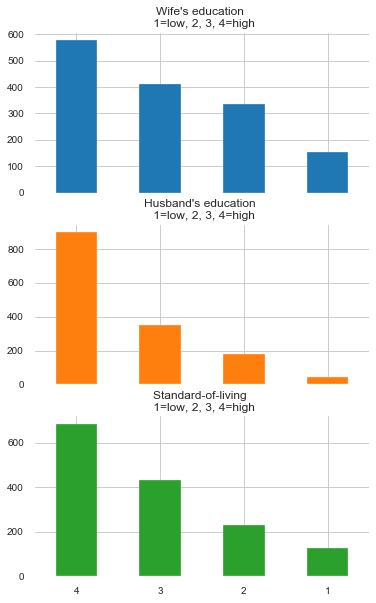

In [15]:
df = pd.DataFrame({"Wife's education \n 1=low, 2, 3, 4=high": dataset['Wifes_education'].value_counts(), 
                   "Husband's education \n 1=low, 2, 3, 4=high" : dataset['Husbands_education'].value_counts(),
                   "Standard-of-living \n 1=low, 2, 3, 4=high": dataset['Standard-of-living_index'].value_counts()})
plt.rcParams['figure.figsize'] = (6,10)
axes = df.plot.bar(rot=0, subplots=True, legend = False)

Text(0.5, 1.0, 'The high-educated wifes choose a long-term method')

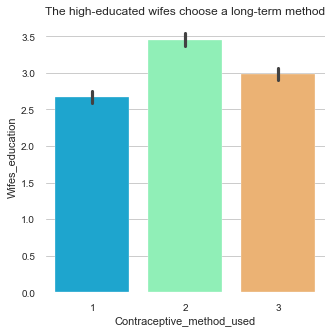

In [16]:
plt.rcParams['figure.figsize'] = (5,5)
sns.barplot(x='Contraceptive_method_used',y='Wifes_education', 
            data=dataset, palette='rainbow').set_title('The high-educated wifes choose a long-term method')

Text(0, 0.5, 'Count of method used')

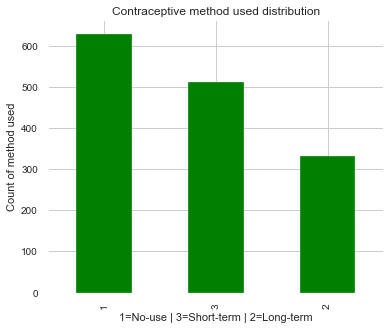

In [17]:
dataset.Contraceptive_method_used.value_counts().plot(kind='bar', color = 'g',figsize=(6,5))
plt.title('Contraceptive method used distribution')
plt.xlabel('1=No-use | 3=Short-term | 2=Long-term')
plt.ylabel('Count of method used')

Text(0.5, 1.0, 'An average age of 32 has no contraception method \n An average age of 35 has a long-term one \n Under 35yo, wifes use a short-term one')

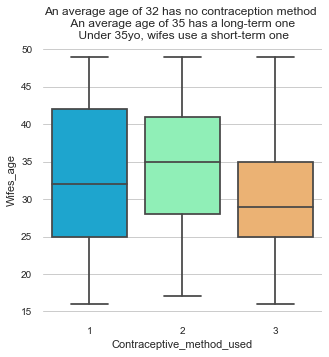

In [18]:
sns.boxplot(x='Contraceptive_method_used',y='Wifes_age', data=dataset, palette='rainbow').set_title('An average age of 32 has no contraception method \n An average age of 35 has a long-term one \n Under 35yo, wifes use a short-term one') 

Text(0.5, 1.0, 'Without any contraception method, an average of  2 children were born \n With a contraception one (short or long), an average of 3 were born \n Short-term method allows more births')

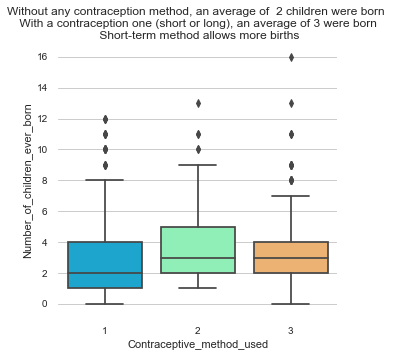

In [19]:
plt.rcParams['figure.figsize'] = (5,5)
sns.boxplot(x='Contraceptive_method_used', y='Number_of_children_ever_born', data=dataset, palette='rainbow').set_title('Without any contraception method, an average of  2 children were born \n With a contraception one (short or long), an average of 3 were born \n Short-term method allows more births')

In [20]:
dataset.Contraceptive_method_used.value_counts() #my target  1=No-use 2=Long-term 3=Short-term

1    629
3    511
2    333
Name: Contraceptive_method_used, dtype: int64

# Prepare the dataset

In [21]:
# get_dummies on numerical categorical variables 
dataset = pd.get_dummies(data=dataset, columns=['Wifes_education','Husbands_education',
                                                'Standard-of-living_index',
                                                'Husbands_occupation'], drop_first= False)

In [22]:
dataset.head()

,Wifes_age,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Media_exposure,Contraceptive_method_used,Wifes_education_1,Wifes_education_2,Wifes_education_3,Wifes_education_4,...,Husbands_education_3,Husbands_education_4,Standard-of-living_index_1,Standard-of-living_index_2,Standard-of-living_index_3,Standard-of-living_index_4,Husbands_occupation_1,Husbands_occupation_2,Husbands_occupation_3,Husbands_occupation_4
0,24,3,1,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,45,10,1,1,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,43,7,1,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
3,42,9,1,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,36,8,1,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [24]:
"""#Standardscaler for columns of ages and nb of children born
col_names = ['Wifes_age','Number_of_children_ever_born']
features = dataset[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
dataset[col_names] = features
"""

from sklearn.preprocessing import minmax_scale
dataset[['Wifes_age','Number_of_children_ever_born']] = minmax_scale(dataset[['Wifes_age','Number_of_children_ever_born']])


Split Dataset

In [25]:
x_columns = [col for col in dataset.columns.values if col != "Contraceptive_method_used"]
dataset_variables = dataset[x_columns]

X, y = dataset[x_columns], dataset.Contraceptive_method_used
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((986, 21), (487, 21), (986,), (487,))

In [27]:
show_df_info(X_train)
display(X_train.head(5))
print()
show_df_info(y_train)
display(y_train.head(5))

<class 'pandas.core.frame.DataFrame'>
amount of entries is 20706
dimensions= 2
shape is (986, 21)
data types of columns:
Wifes_age                       float64
Number_of_children_ever_born    float64
Wifes_religion                    int64
Wifes_now_working%3F              int64
Media_exposure                    int64
Wifes_education_1                 uint8
Wifes_education_2                 uint8
Wifes_education_3                 uint8
Wifes_education_4                 uint8
Husbands_education_1              uint8
Husbands_education_2              uint8
Husbands_education_3              uint8
Husbands_education_4              uint8
Standard-of-living_index_1        uint8
Standard-of-living_index_2        uint8
Standard-of-living_index_3        uint8
Standard-of-living_index_4        uint8
Husbands_occupation_1             uint8
Husbands_occupation_2             uint8
Husbands_occupation_3             uint8
Husbands_occupation_4             uint8
dtype: object


,Wifes_age,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Media_exposure,Wifes_education_1,Wifes_education_2,Wifes_education_3,Wifes_education_4,Husbands_education_1,...,Husbands_education_3,Husbands_education_4,Standard-of-living_index_1,Standard-of-living_index_2,Standard-of-living_index_3,Standard-of-living_index_4,Husbands_occupation_1,Husbands_occupation_2,Husbands_occupation_3,Husbands_occupation_4
544,0.666667,0.3750,1,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1149,0.606061,0.1875,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
75,0.151515,0.0625,1,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
460,0.696970,0.2500,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
114,0.151515,0.0000,1,1,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0



<class 'pandas.core.series.Series'>
amount of entries is 986
dimensions= 1
shape is (986,)
data types of columns:
int64


544     2
1149    1
75      1
460     2
114     1
Name: Contraceptive_method_used, dtype: int64

Train

In [ ]:
"""#logistic regression
from sklearn.preprocessing import RobustScaler 

scaler = RobustScaler() 
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)


scaled_logreg = LogisticRegression()
scaled_logreg.fit(X_train_transformed, y_train)
y_pred = scaled_logreg.predict(X_test_transformed)

print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred,average=None))
print("Recall score:", recall_score(y_test, y_pred,average=None))
print("f1 score:", f1_score(y_test, y_pred,average=None))"""

In [ ]:
"""# Random Forest Classifier
from sklearn.preprocessing import RobustScaler 

scaler = RobustScaler() 
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)


scaled_rfc = RandomForestClassifier()
scaled_rfc.fit(X_train_transformed, y_train)
y_pred = scaled_rfc.predict(X_test_transformed)

print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred,average=None))
print("Recall score:", recall_score(y_test, y_pred,average=None))
print("f1 score:", f1_score(y_test, y_pred,average=None))"""

In [ ]:
"""# Kneighbor classifier

neighbor = KNeighborsClassifier(n_neighbors=3)
neighbor.fit(X_train, y_train)
y_pred = neighbor.predict(X_test)
scores = cross_val_score(neighbor, X_train, y_train, cv=5)
print(scores)
meanCvAccuracy = scores.mean()
print("Mean CV accuracy= %f" % meanCvAccuracy)

print("Precision score:", precision_score(y_test, y_pred,average=None))
print("Recall score:", recall_score(y_test, y_pred,average=None))
print("f1 score:", f1_score(y_test, y_pred,average=None))
print(confusion_matrix(y_test, y_pred))"""

In [28]:
# RFC Model with gridsearch
rfc = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

#CV_rfc.fit(X_train, y_train)


Create Pipeline when the right model is found

In [29]:
cart_model = CV_rfc

pipe = pipeline.Pipeline(steps=[
    ("feature_selection", SelectKBest(chi2, k="all")),
    ("scale", preprocessing.StandardScaler()),  
    ("CART", cart_model)])

steps=[("feature_selection", SelectKBest(chi2, k="all")),
    ("scale", preprocessing.StandardScaler()),  
    ("CART", cart_model)]

preprocessing.StandardScaler()

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function chi2 at 0x000002B21039D048>)),
                ('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('CART',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features...
                                                               min_weight_fraction_leaf=0.0,
                                                               n_estimators='warn',
                                                

In [ ]:
#X_train.head()

Evaluate

In [31]:
y_pred = pipe.predict(X_test)
scores = cross_val_score(pipe, X_train, y_train, cv=5)
print(scores)
meanCvAccuracy = scores.mean()
print("Mean CV accuracy= %f" % meanCvAccuracy)


print(confusion_matrix(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred,average=None))
print("Recall score:", recall_score(y_test, y_pred,average=None))
print("f1 score:", f1_score(y_test, y_pred,average=None))

[0.56281407 0.53535354 0.49746193 0.57142857 0.52040816]
Mean CV accuracy= 0.537493
[[143  24  51]
 [ 27  36  33]
 [ 64  29  80]]
Precision score: [0.61111111 0.40449438 0.48780488]
Recall score: [0.6559633  0.375      0.46242775]
f1 score: [0.63274336 0.38918919 0.47477745]


In [32]:
# use as quality metric the average CV score
scores = cross_val_score(pipe, X_train, y_train, cv=5)
print(scores)
meanCvAccuracy = scores.mean()
print("Mean CV accuracy= %f" % meanCvAccuracy)

[0.56281407 0.53535354 0.49746193 0.57142857 0.52040816]
Mean CV accuracy= 0.537493


Save the Pipeline

In [ ]:
joblib.dump(pipe, PIPELINEPATH, compress = 1)

Load the Pipeline

In [ ]:
pipeline_loaded = joblib.load(PIPELINEPATH)

Predict on the test instances

In [ ]:
result = pipeline_loaded.predict(X_test)
print('the result of prediction on the test is: \n', result)

In [ ]:
class_names = list(dataset.Contraceptive_method_used.unique())

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    Returns
           The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap = 'cool')
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return 'My awesome confusion matrix !'

In [ ]:
print_confusion_matrix(confusion_matrix(y_test, result), class_names)

In [ ]:
"""
# Split the dataset in two parts
# Set the parameters by cross-validation
tuned_parameters = [{'splitter': ['best', 'random'], 'max_depth': [5, 10, 50, None]}]
scores = ['f1']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score, '\n')
    clf = GridSearchCV(tree.DecisionTreeClassifier(), tuned_parameters, cv = 10,
                       scoring='%s_weighted' % score)
    clf.fit(X, y)
    print("Best parameters set found on development set:", '\n')
    print(clf.best_params_, '\n')
    print("Grid scores on development set:", '\n')
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params), '\n')
"""

In [ ]:
"""
# Tune only step n°3 in the pipe
forest = pipe[2]

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1] - 1) :
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1] - 1), importances[indices],
       color="m", align="center")
plt.xticks(range(X.shape[1] - 1), indices)
plt.xlim([-1, X.shape[1] - 1])
plt.show()"""